# Retail Sales Analysis Project --

### Importing Libraries :

In [55]:
!pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset :

In [3]:
df1 = pd.read_excel("Online Retail.xlsx", dtype = {"InvoiceNo": "string", "StockCode":"string", "Description":"string", "Country":"string"})
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data Inspection : 

In [4]:
df1.shape

(541909, 8)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [6]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [12]:
df1[df1.StockCode== "22139"].Description.mode()

0    RETROSPOT TEA SET CERAMIC 11 PC 
dtype: string

In [13]:
most_frequent = df1[["StockCode", "Description"]].value_counts().reset_index()
most_frequent

,StockCode,Description,0
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35954,counted,1
4788,35954,check,1
4789,35923,check,1
4790,35915C,damaged,1


In [14]:
most_frequent[most_frequent.StockCode == "85123A"].head(1)

,StockCode,Description,0
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [15]:
most_frequent = most_frequent.groupby("StockCode").head(1)
most_frequent

,StockCode,Description,0
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4767,35600A,Found by jackie,1
4769,35597B,BLACKCHRISTMAS TREE 30CM,1
4770,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,1
4777,37330,BIG POLKADOT MUG,1


In [16]:
most_frequent.columns = ["StockCode", "Frequent_Description", "Count"]
most_frequent
df2 = df1.merge(most_frequent, on = "StockCode", how = "left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Frequent_Description,Count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [17]:
df2["Description"] = df2["Frequent_Description"]
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Frequent_Description,Count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [18]:
df2.isnull().sum()

InvoiceNo                    0
StockCode                    0
Description                112
Quantity                     0
InvoiceDate                  0
UnitPrice                    0
CustomerID              135080
Country                      0
Frequent_Description       112
Count                      112
dtype: int64

In [19]:
from re import sub
df2.dropna(subset = ["Description"], inplace = True)
df2.isnull().sum()

InvoiceNo                    0
StockCode                    0
Description                  0
Quantity                     0
InvoiceDate                  0
UnitPrice                    0
CustomerID              134968
Country                      0
Frequent_Description         0
Count                        0
dtype: int64

In [20]:
df2.drop(columns=["Frequent_Description", "Count"], inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
df2.describe()

,Quantity,UnitPrice,CustomerID
count,541797.000000,541797.000000,406829.000000
mean,9.555919,4.612067,15287.690570
std,218.103428,96.769831,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [22]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [23]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [24]:
df3 = df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [25]:
df3 = df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [26]:
df3.Quantity.quantile(0.9999)

1439.8763999990188

In [27]:
df3[df3.Quantity>1500].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom


## 1. Feature Engineering : Create New Columns

In [29]:
df4 = df3.copy()
df4["TotalSales"] = df4.Quantity * df4.UnitPrice
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [30]:
df4["Month"]= df4["InvoiceDate"].dt.month
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


## 2. Visualization & EDA

### 2.1  Monthly Sales Graph

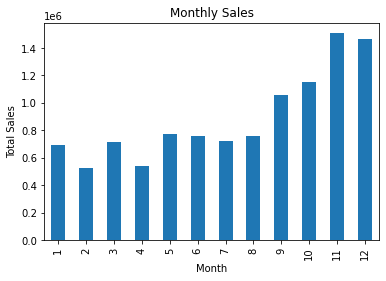

In [31]:
# Monthly Sales Bar Graph
monthly_sales = df4.groupby("Month").TotalSales.sum()
monthly_sales.plot(kind="bar", title="Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

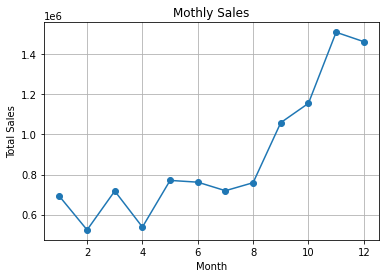

In [32]:
# Monthly Sales Line Graph
monthly_sales.plot(kind = "line", title="Mothly Sales", marker= "o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()  
plt.show()  

***Insights : 
        Total sales from January to August are fluctuating but, from August is started rising up and reached its peak in November. This is probably due to the Holiday season at the end of the year.***

### 2.2 Top 5 Countries by Sales :

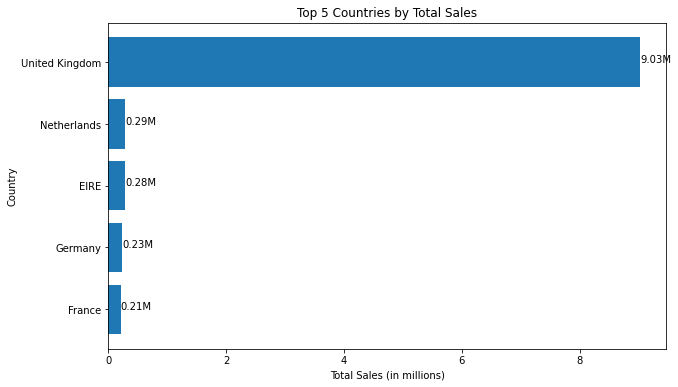

In [33]:
# Top 5 countries by total sales
top_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)

# Plotting horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_countries.index, top_countries.values / 1000000)  # Divide by 1 million
plt.xlabel("Total Sales (in millions)")
plt.ylabel("Country")
plt.title("Top 5 Countries by Total Sales")
plt.gca().invert_yaxis()

# Annotate the bars with the sales values
for index, value in enumerate(top_countries.values):
    plt.text(value / 1000000, index, f'{value/1000000:.2f}M')

plt.show()


### Top 5 Countries by Sales Percentage :

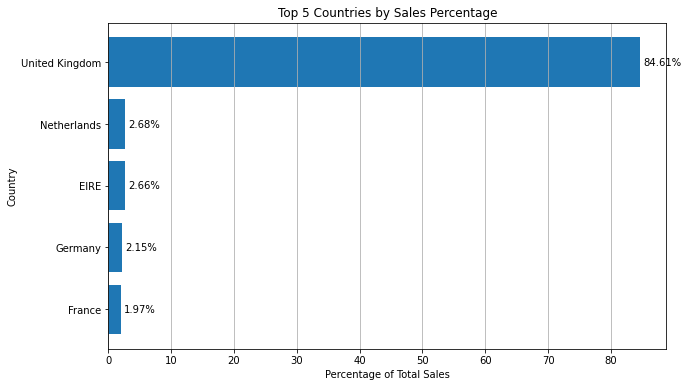

In [34]:
# Calculate total sales for each country
country_wise_sales = df4.groupby('Country')['TotalSales'].sum()

# Calculate the percentage of total sales for each country
total_sales = country_wise_sales.sum()
country_sales_percent = (country_wise_sales / total_sales) * 100

# Get the top 5 countries by sales percentage
top5_countries_percent = country_sales_percent.sort_values(ascending=False).head(5)

# Create the horizontal bar chart with percentages
plt.figure(figsize=(10, 6))
bars = plt.barh(top5_countries_percent.index, top5_countries_percent.values)
plt.xlabel("Percentage of Total Sales")
plt.ylabel("Country")
plt.title("Top 5 Countries by Sales Percentage")
plt.grid(axis='x')
plt.gca().invert_yaxis()

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 0.5  # Adjust position as needed
    label_y_pos = bar.get_y() + bar.get_height() / 2
    plt.text(label_x_pos, label_y_pos, f"{width:.2f}%", va='center')

plt.show()

### 2.3 Top 5 Products by Sales :

In [36]:
top_5_products = df4.groupby(df4.StockCode).TotalSales.sum().sort_values(ascending=False).head(5)
top_5_products

StockCode
DOT       206248.77
22423     174484.74
23843     168469.60
85123A    104518.80
47566      99504.33
Name: TotalSales, dtype: float64

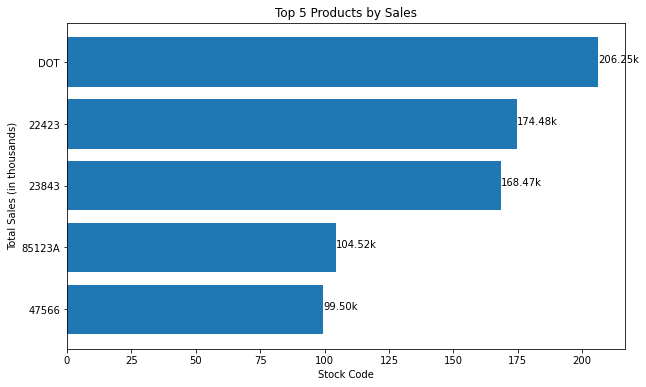

In [37]:
plt.figure(figsize=(10, 6))
plt.barh(top_5_products.index, top_5_products.values / 1000)  # Divide by 1000
plt.xlabel("Stock Code")
plt.ylabel("Total Sales (in thousands)")
plt.gca().invert_yaxis()
plt.title("Top 5 Products by Sales")

# Annotate the bars with the sales values in thousands
for index, value in enumerate(top_5_products.values):
    plt.text(value / 1000, index, f'{value/1000:.2f}k') #display values in thousands

plt.show()

### Top 5 Products Description :

In [38]:
for stock_code in top_5_products.index:
  Description = df4[df4.StockCode== stock_code].Description.iloc[0]
  print(f"{stock_code} ==> {Description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


### Top 5 Products Sales Percentage : 

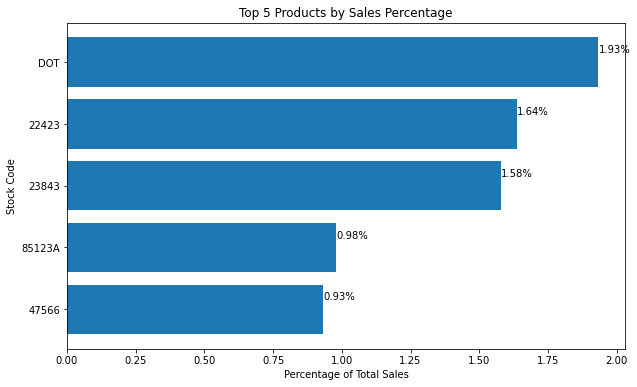

In [39]:
product_wise_sales = df4.groupby("StockCode").TotalSales.sum()

total_product_sales = product_wise_sales.sum()

product_sales_percent = (product_wise_sales/total_product_sales)*100

top_5_products_percent = product_sales_percent.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_products_percent.index, top_5_products_percent.values)
plt.xlabel("Percentage of Total Sales")
plt.ylabel("Stock Code")
plt.title("Top 5 Products by Sales Percentage")
plt.gca().invert_yaxis()

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width  # Adjust position as needed
    label_y_pos = bar.get_y() + bar.get_height() / 4
    plt.text(label_x_pos, label_y_pos, f"{width:.2f}%", va='center')

plt.show()

## 3. RFM ANALYSIS (Recency, Frequency, Monetary) :

In [41]:
df4["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [42]:
current_date = df4["InvoiceDate"].max()+pd.Timedelta(days=1)
rfm = df4.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (current_date - x.max()).days,
    "InvoiceNo": "count",
    "TotalSales": "sum"
})

rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [43]:
rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,91.720609,2054.266460
std,100.014169,228.785094,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,307.415000
50%,51.000000,41.000000,674.485000
75%,142.000000,100.000000,1661.740000
max,374.000000,7847.000000,280206.020000


### 3.1 Segment Customers based on RFM :

In [45]:
rfm["R_Segment"] = pd.qcut(rfm["Recency"], 4, labels=[4, 3, 2, 1])
rfm["F_Segment"] = pd.qcut(rfm["Frequency"], 4, labels=[1,2,3,4])
rfm["M_Segment"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])
rfm["RFM_Score"] = rfm[["R_Segment", "F_Segment", "M_Segment"]].sum(axis=1)
rfm.head()

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4


In [46]:
rfm.sort_values("RFM_Score", ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18102.0,1,431,259657.30,4,4,4,12
14367.0,8,524,9261.52,4,4,4,12
17625.0,18,315,2047.00,4,4,4,12
15484.0,1,188,3594.31,4,4,4,12
14395.0,2,350,3507.71,4,4,4,12
...,...,...,...,...,...,...,...
13133.0,274,7,109.80,1,1,1,3
15578.0,162,13,127.10,1,1,1,3
13144.0,333,3,110.95,1,1,1,3


## 4. Customer Churn Analysis :

In [48]:
# Create a basket matrix for association rule mining
customer_last_purchase = df4.groupby('CustomerID')['InvoiceDate'].max()
customer_last_purchase.head()

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

In [49]:
type(customer_last_purchase)

pandas.core.series.Series

In [50]:
current_date

Timestamp('2011-12-10 12:50:00')

In [51]:
customer_last_purchase = (current_date - customer_last_purchase).dt.days
customer_last_purchase.head()

CustomerID
12346.0    326
12347.0      2
12348.0     75
12349.0     19
12350.0    310
Name: InvoiceDate, dtype: int64

In [52]:
# Customer Churn Threshold (90 Days without purchase)
churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head()

CustomerID
12346.0    326
12350.0    310
12353.0    204
12354.0    232
12355.0    214
Name: InvoiceDate, dtype: int64

In [53]:
print("Number of Customers Churned: ", len(churned_customers))

Number of Customers Churned:  1449


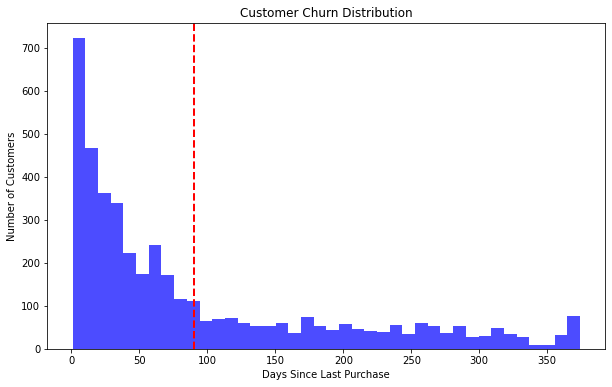

In [54]:
plt.figure(figsize=(10,6))
plt.hist(customer_last_purchase, bins=40, color = "blue", alpha=0.7)
plt.axvline(x=churn_threshold, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Distribution")
plt.show()

### Insights :

*Histogram shows that the majority of customers are loyal (Recency ≤ 90 days), while only a small portion have churned (Recency > 90 days). This indicates strong customer retention but a need to re-engage churned users.*

### Suggestions :

#### 1. Retention: Reward loyal customers with personalized offers, discounts, or loyalty programs to maintain engagement.
#### 2. Win-Back: Target churned customers with reactivation campaigns like special discounts, personalized emails, or limited-time offers to encourage them to return.*
#### 3. Proactive Engagement: Identify at-risk customers (Recency between 60-90 days) and engage them early through reminders, exclusive deals, or value-added services to prevent churn.*